# Importing Necessary Libraries and datasets

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline 
# %config InlineBackend.figure_format = 'retina' ## This is preferable for retina display. 

import warnings ## importing warnings library. 
warnings.filterwarnings('ignore') ## Ignore warning



import os ## imporing os
print(os.listdir("../ML11project-titanic/"))

['.ipynb_checkpoints', 'a-statistical-analysis-ml-workflow-of-titanic.ipynb', 'titanic', 'Untitled.ipynb']


In [2]:
## Importing the datasets
train = pd.read_csv("../ML11project-titanic/titanic/train.csv")
test = pd.read_csv("../ML11project-titanic/titanic/test.csv")

In [3]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
temp = train.groupby("Sex")['Age'].min().to_frame().reset_index()

In [5]:
temp


Sex   Age
0  female  0.75
1    male  0.42

In [6]:
temp = temp.rename(columns={"Age": "min_age"})

In [7]:
temp

Sex  min_age
0  female     0.75
1    male     0.42

In [8]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [9]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Train Set

In [10]:
%%time
train.sample(5)

CPU times: total: 0 ns
Wall time: 2.39 ms


PassengerId  Survived  Pclass  \
169          170         0       3   
400          401         1       3   
36            37         1       3   
527          528         0       1   
142          143         1       3   

                                                  Name     Sex   Age  SibSp  \
169                                      Ling, Mr. Lee    male  28.0      0   
400                                 Niskanen, Mr. Juha    male  39.0      0   
36                                    Mamee, Mr. Hanna    male   NaN      0   
527                                 Farthing, Mr. John    male   NaN      0   
142  Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...  female  24.0      1   

     Parch             Ticket      Fare Cabin Embarked  
169      0               1601   56.4958   NaN        S  
400      0  STON/O 2. 3101289    7.9250   NaN        S  
36       0               2677    7.2292   NaN        C  
527      0           PC 17483  221.7792   C95        S  
142      0   STON/O2. 3101279   15.8500   NaN        S

# Test Set

In [11]:
## Take a look at the overview of the dataset. 
%timeit test.sample(5)

125 µs ± 2.63 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [12]:
print ("The shape of the train data is (row, column):"+ str(train.shape))
print (train.info())
print ("The shape of the test data is (row, column):"+ str(test.shape))
print (test.info())

The shape of the train data is (row, column):(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
The shape of the test data is (row, column):(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Nul

# Tableau Visualization of the Data

In [13]:
%%HTML
<div class='tableauPlaceholder' id='viz1516349898238' style='position: relative'><noscript><a href='#'><img alt='An Overview of Titanic Training Dataset ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ti&#47;Titanic_data_mining&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Titanic_data_mining&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ti&#47;Titanic_data_mining&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1516349898238');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

# Part 2: Overview and Cleaning the Data

# Overview

In [14]:
## saving passenger id in advance in order to submit later. 
passengerid = test.PassengerId
## We will drop PassengerID and Ticket since it will be useless for our data. 
#train.drop(['PassengerId'], axis=1, inplace=True)
#test.drop(['PassengerId'], axis=1, inplace=True)

print (train.info())
print ("*"*40)
print (test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pass

# Dealing with Missing values

Missing values in train dataset.

In [15]:
# Let's write a functin to print the total percentage of the missing values.(this can be a good exercise for beginners to try to write simple functions like this.)
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [16]:
%timeit -r2 -n10 missing_percentage(train) # setting the number of runs(-r) and/or loops (-n)

2.69 ms ± 528 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)


In [17]:
missing_percentage(train)

Total  Percent
Cabin          687    77.10
Age            177    19.87
Embarked         2     0.22
PassengerId      0     0.00
Survived         0     0.00
Pclass           0     0.00
Name             0     0.00
Sex              0     0.00
SibSp            0     0.00
Parch            0     0.00
Ticket           0     0.00
Fare             0     0.00

Missing values in test set.

In [18]:
%%timeit -r2 -n10 
missing_percentage(test)

1.56 ms ± 125 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)


In [19]:
missing_percentage(test)

Total  Percent
Cabin          327    78.23
Age             86    20.57
Fare             1     0.24
PassengerId      0     0.00
Pclass           0     0.00
Name             0     0.00
Sex              0     0.00
SibSp            0     0.00
Parch            0     0.00
Ticket           0     0.00
Embarked         0     0.00

# Embarked feature

In [20]:
def percent_value_counts(df, feature):
    """This function takes in a dataframe and a column and finds the percentage of the value_counts"""
    percent = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    ## creating a df with th
    total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))
    ## concating percent and total dataframe

    total.columns = ["Total"]
    percent.columns = ['Percent']
    return pd.concat([total, percent], axis = 1)
    

In [21]:
percent_value_counts(train, 'Embarked')

Total  Percent
Embarked                
S           644    72.28
C           168    18.86
Q            77     8.64
NaN           2     0.22

In [22]:
percent_value_counts(train, 'Embarked')

Total  Percent
Embarked                
S           644    72.28
C           168    18.86
Q            77     8.64
NaN           2     0.22

In [23]:
train[train.Embarked.isnull()]

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN

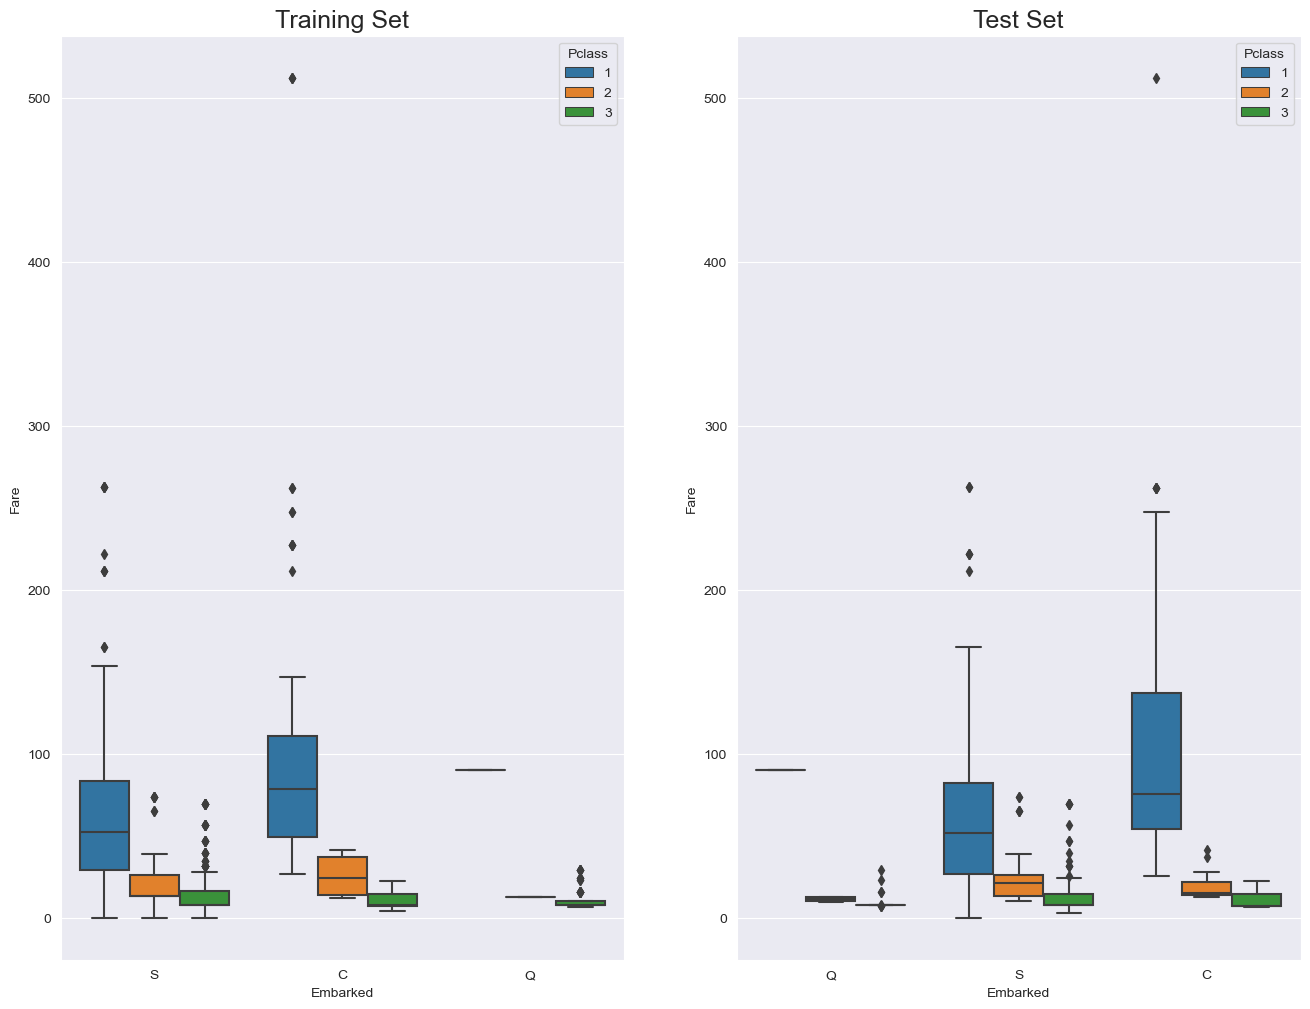

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(16,12),ncols=2)
ax1 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=train, ax = ax[0]);
ax2 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=test, ax = ax[1]);
ax1.set_title("Training Set", fontsize = 18)
ax2.set_title('Test Set',  fontsize = 18)


# ## Fixing legends
# leg_1 = ax1.get_legend()
# leg_1.set_title("PClass")
# legs = leg_1.texts
# legs[0].set_text('Upper')
# legs[1].set_text('Middle')
# legs[2].set_text('Lower')

fig.show()

In [25]:
## Replacing the null values in the Embarked column with the mode. 
train.Embarked.fillna("C", inplace=True)

# Cabin Feature

In [26]:
print("Train Cabin missing: " + str(train.Cabin.isnull().sum()/len(train.Cabin)))
print("Test Cabin missing: " + str(test.Cabin.isnull().sum()/len(test.Cabin)))

Train Cabin missing: 0.7710437710437711
Test Cabin missing: 0.7822966507177034


In [27]:
## Concat train and test into a variable "all_data"
survivers = train.Survived

train.drop(["Survived"],axis=1, inplace=True)

all_data = pd.concat([train,test], ignore_index=False)

## Assign all the null values to N
all_data.Cabin.fillna("N", inplace=True)

In [28]:
all_data.Cabin = [i[0] for i in all_data.Cabin]

In [29]:
percent_value_counts(all_data, "Cabin")

Total  Percent
Cabin                
N       1014    77.46
C         94     7.18
B         65     4.97
D         46     3.51
E         41     3.13
A         22     1.68
F         21     1.60
G          5     0.38
T          1     0.08

In [30]:
all_data.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [31]:
def cabin_estimator(i):
    """Grouping cabin feature by the first letter"""
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>= 47 and i<53:
        a = "E"
    elif i>= 53 and i<54:
        a = "D"
    elif i>=54 and i<116:
        a = 'C'
    else:
        a = "B"
    return a
    

In [32]:
with_N = all_data[all_data.Cabin == "N"]

without_N = all_data[all_data.Cabin != "N"]

In [33]:
##applying cabin estimator function. 
with_N['Cabin'] = with_N.Fare.apply(lambda x: cabin_estimator(x))

## getting back train. 
all_data = pd.concat([with_N, without_N], axis=0)

## PassengerId helps us separate train and test. 
all_data.sort_values(by = 'PassengerId', inplace=True)

## Separating train and test from all_data. 
train = all_data[:891]

test = all_data[891:]

# adding saved target variable with train. 
train['Survived'] = survivers

# Fare Feature

In [34]:
test[test.Fare.isnull()]

PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Cabin Embarked  
152   NaN     B        S

In [35]:
missing_value = test[(test.Pclass == 3) & 
                     (test.Embarked == "S") & 
                     (test.Sex == "male")].Fare.mean()
## replace the test.fare null values with test.fare mean
test.Fare.fillna(missing_value, inplace=True)

# Age Feature

In [36]:
print ("Train age missing value: " + str((train.Age.isnull().sum()/len(train))*100)+str("%"))
print ("Test age missing value: " + str((test.Age.isnull().sum()/len(test))*100)+str("%"))

Train age missing value: 19.865319865319865%
Test age missing value: 20.574162679425836%


# Part 3. Visualization and Feature Relations

# 3a. Gender and Survived

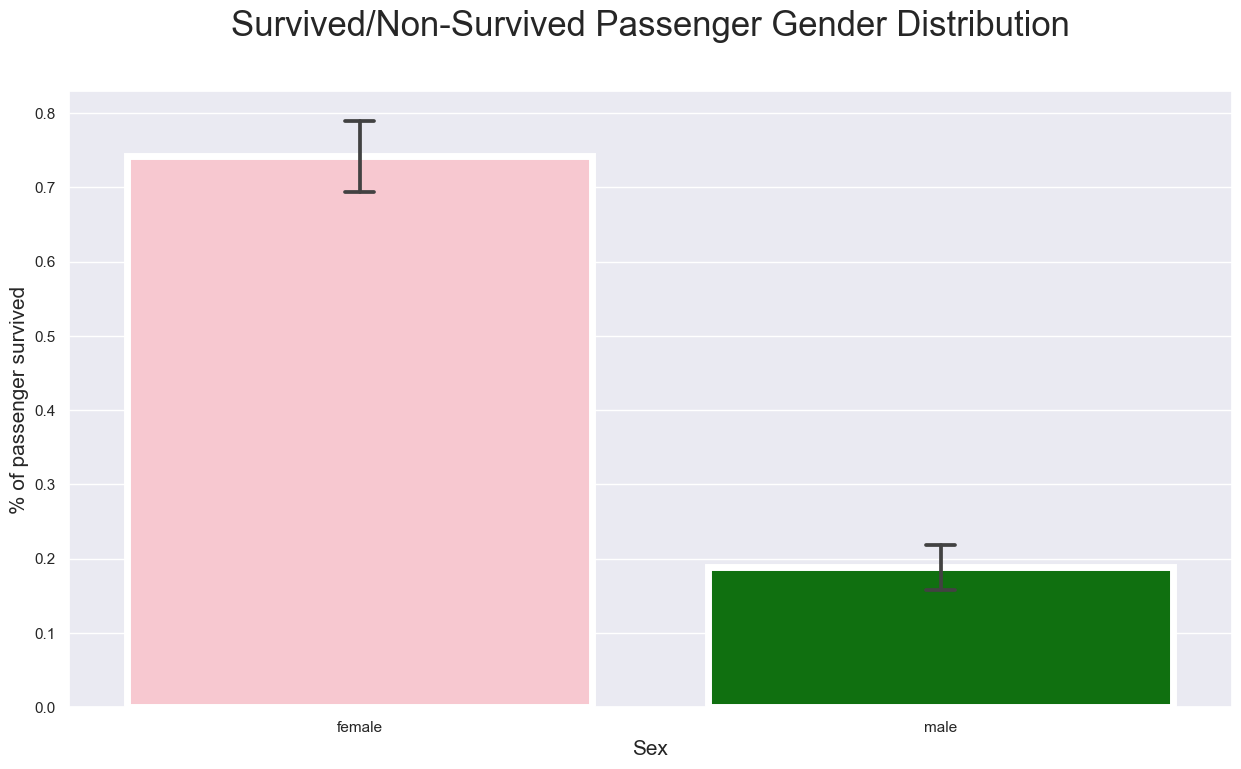

In [37]:
import seaborn as sns
pal = {'male':"green", 'female':"Pink"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.barplot(x = "Sex", 
                 y = "Survived", 
                 data=train, 
                 palette = pal,
                 linewidth=5,
                 order = ['female','male'],
                 capsize = .05,

                )

plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 25,loc = 'center', pad = 40)
plt.ylabel("% of passenger survived", fontsize = 15, )
plt.xlabel("Sex",fontsize = 15);



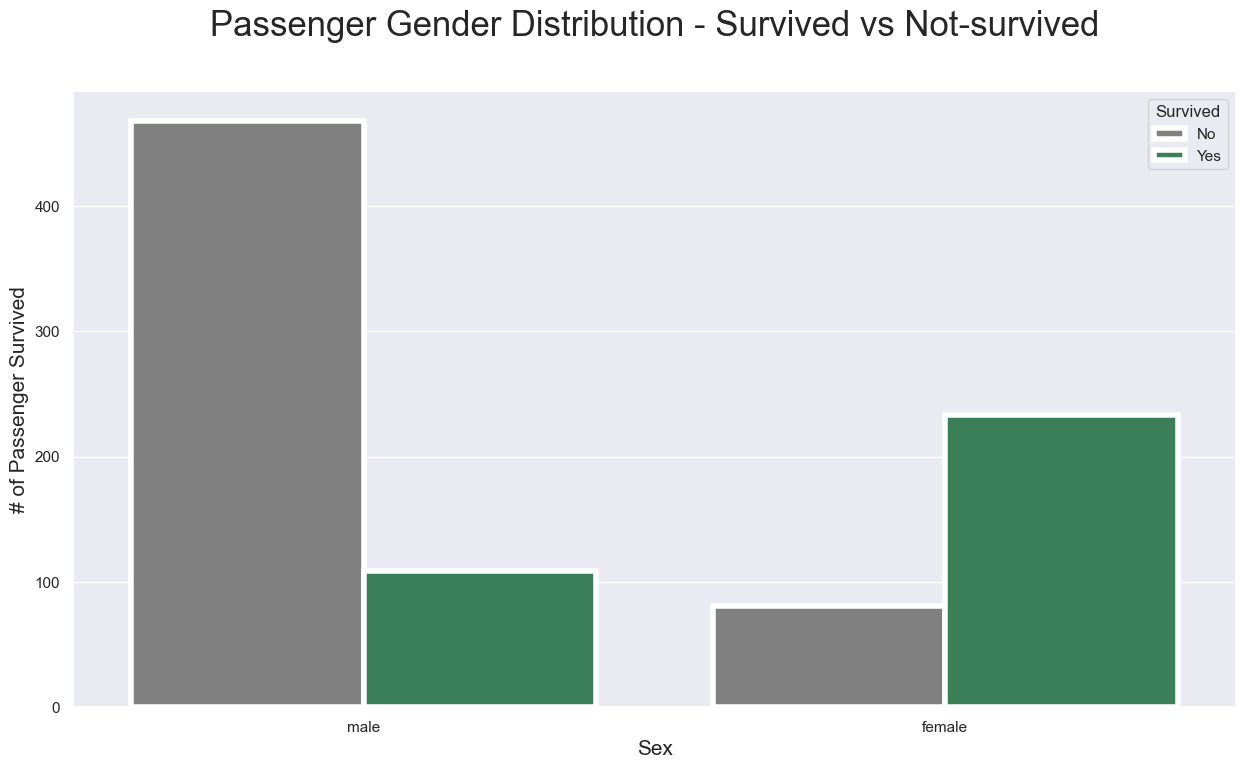

In [38]:
pal = {1:"seagreen", 0:"gray"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.countplot(x = "Sex", 
                   hue="Survived",
                   data = train, 
                   linewidth=4, 
                   palette = pal
)

## Fixing title, xlabel and ylabel
plt.title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 25, pad=40)
plt.xlabel("Sex", fontsize = 15);
plt.ylabel("# of Passenger Survived", fontsize = 15)

## Fixing xticks
#labels = ['Female', 'Male']
#plt.xticks(sorted(train.Sex.unique()), labels)

## Fixing legends
leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

# 3b. Pclass and Survived



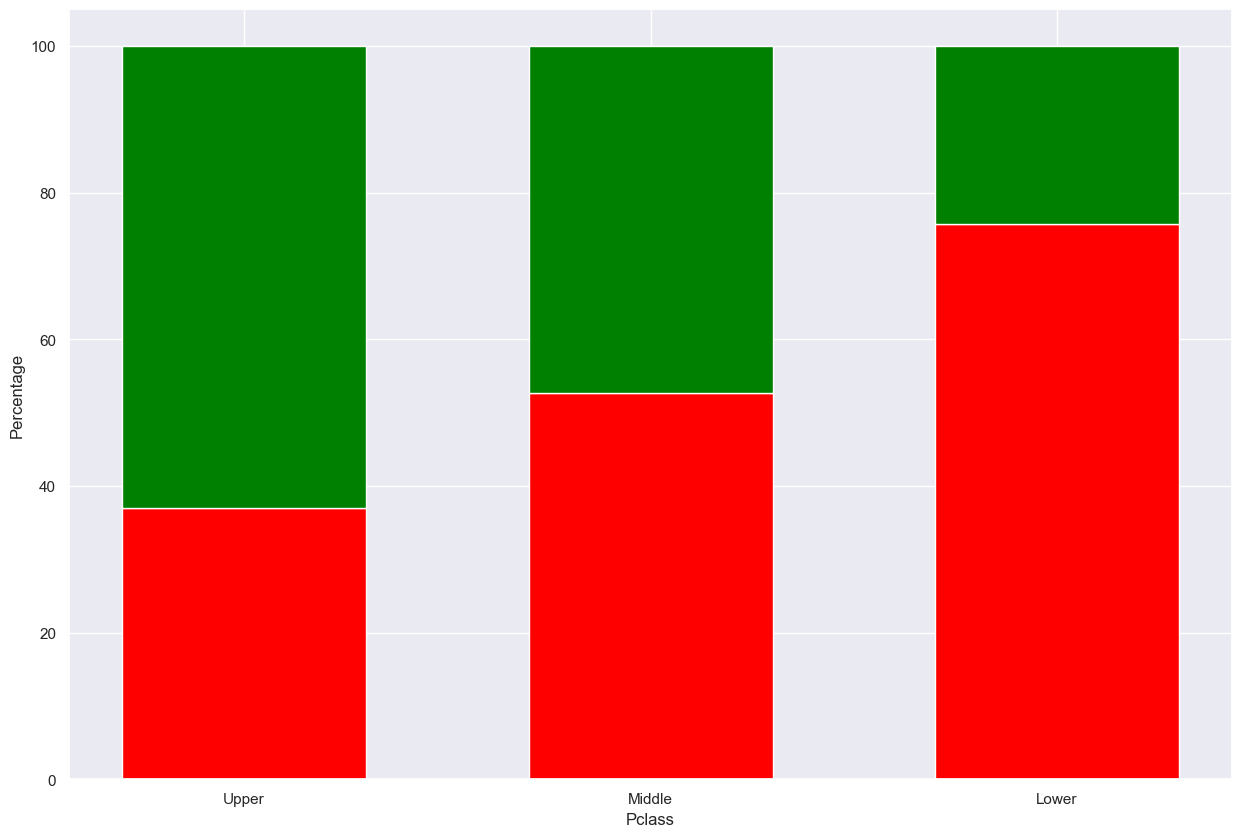

In [39]:
temp = train[['Pclass', 'Survived', 'PassengerId']].groupby(['Pclass', 'Survived']).count().reset_index()
temp_df = pd.pivot_table(temp, values = 'PassengerId', index = 'Pclass',columns = 'Survived')
names = ['No', 'Yes']
temp_df.columns = names
r = [0,1,2]
totals = [i+j for i, j in zip(temp_df['No'], temp_df['Yes'])]
No_s = [i / j * 100 for i,j in zip(temp_df['No'], totals)]
Yes_s = [i / j * 100 for i,j in zip(temp_df['Yes'], totals)]
## Plotting
plt.subplots(figsize = (15,10))
barWidth = 0.60
names = ('Upper', 'Middle', 'Lower')
# Create green Bars
plt.bar(r, No_s, color='Red', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, Yes_s, bottom=No_s, color='Green', edgecolor='white', width=barWidth)

 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("Pclass")
plt.ylabel('Percentage')
 
# Show graphic
plt.show()


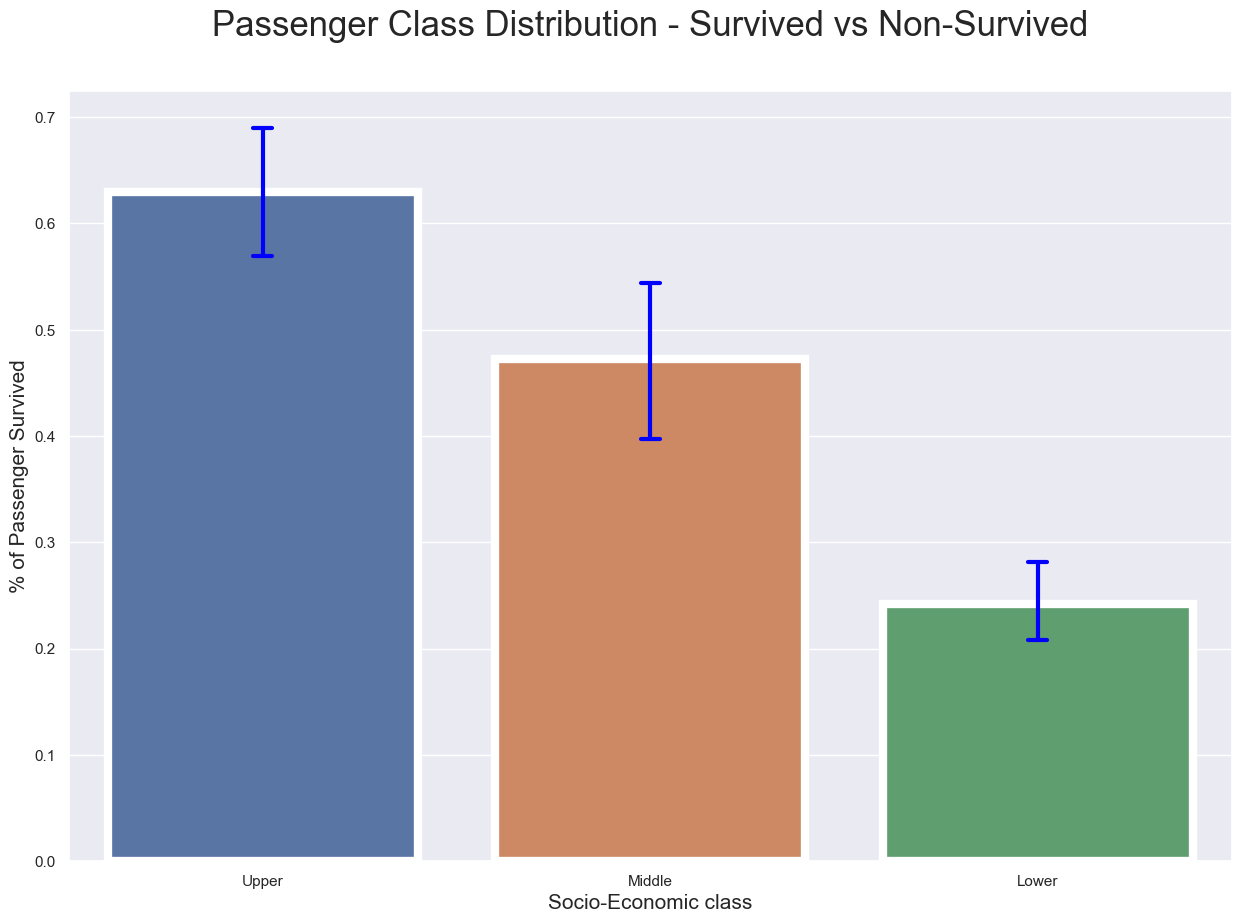

In [40]:
plt.subplots(figsize = (15,10))
sns.barplot(x = "Pclass", 
            y = "Survived", 
            data=train, 
            linewidth=6,
            capsize = .05,
            errcolor='blue',
            errwidth = 3
            

           )
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25, pad=40)
plt.xlabel("Socio-Economic class", fontsize = 15);
plt.ylabel("% of Passenger Survived", fontsize = 15);
names = ['Upper', 'Middle', 'Lower']
#val = sorted(train.Pclass.unique())
val = [0,1,2] ## this is just a temporary trick to get the label right. 
plt.xticks(val, names);

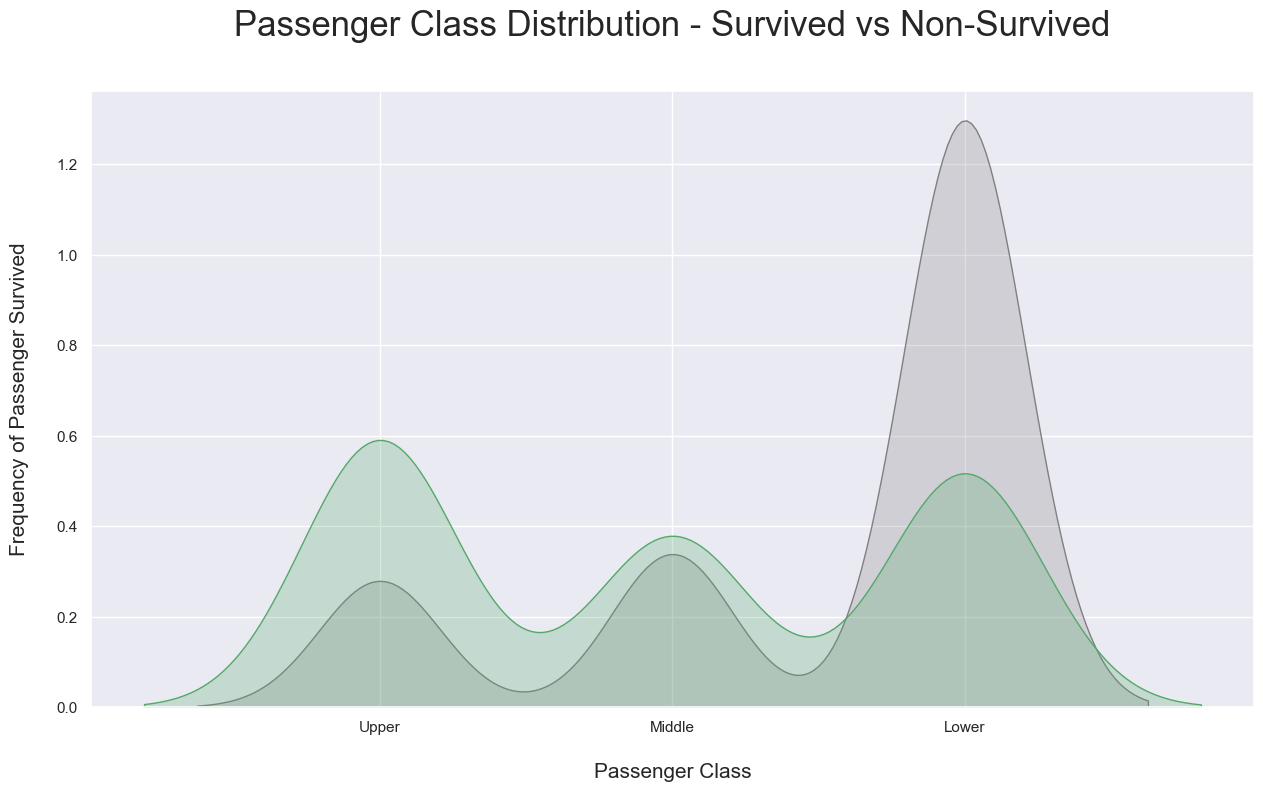

In [41]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
## I have included to different ways to code a plot below, choose the one that suites you. 
ax=sns.kdeplot(train.Pclass[train.Survived == 0] , 
               color='gray',
               shade=True,
               label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'] , 
               color='g',
               shade=True, 
               label='survived', 
              )
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Passenger Class", fontsize = 15,labelpad =20)
## Converting xticks into words for better understanding
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(train.Pclass.unique()), labels);

# 3c. Fare and Survived

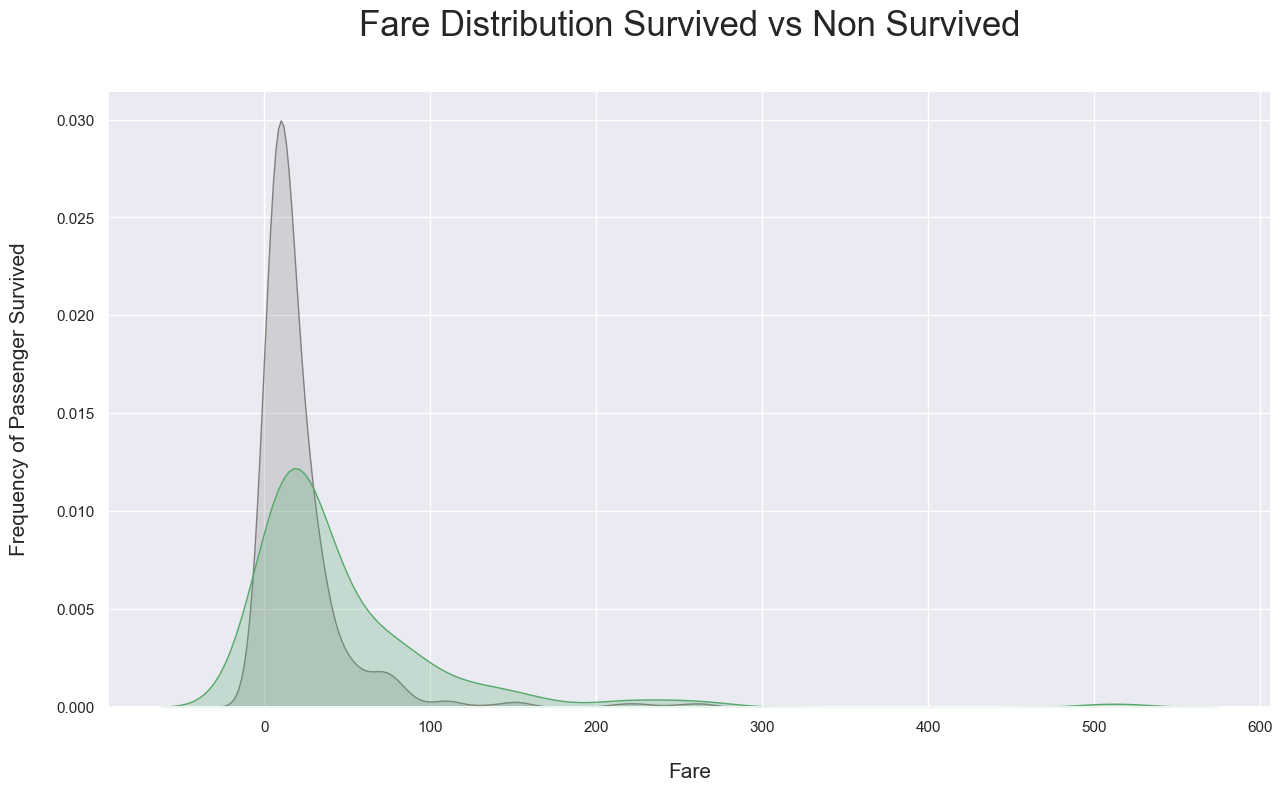

In [42]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'] , color='g',shade=True, label='survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Fare", fontsize = 15, labelpad = 20);



In [43]:
train[train.Fare > 280]

PassengerId  Pclass                                Name     Sex   Age  \
258          259       1                    Ward, Miss. Anna  female  35.0   
679          680       1  Cardeza, Mr. Thomas Drake Martinez    male  36.0   
737          738       1              Lesurer, Mr. Gustave J    male  35.0   

     SibSp  Parch    Ticket      Fare Cabin Embarked  Survived  
258      0      0  PC 17755  512.3292     B        C         1  
679      0      1  PC 17755  512.3292     B        C         1  
737      0      0  PC 17755  512.3292     B        C         1

# 3d. Age and Survived

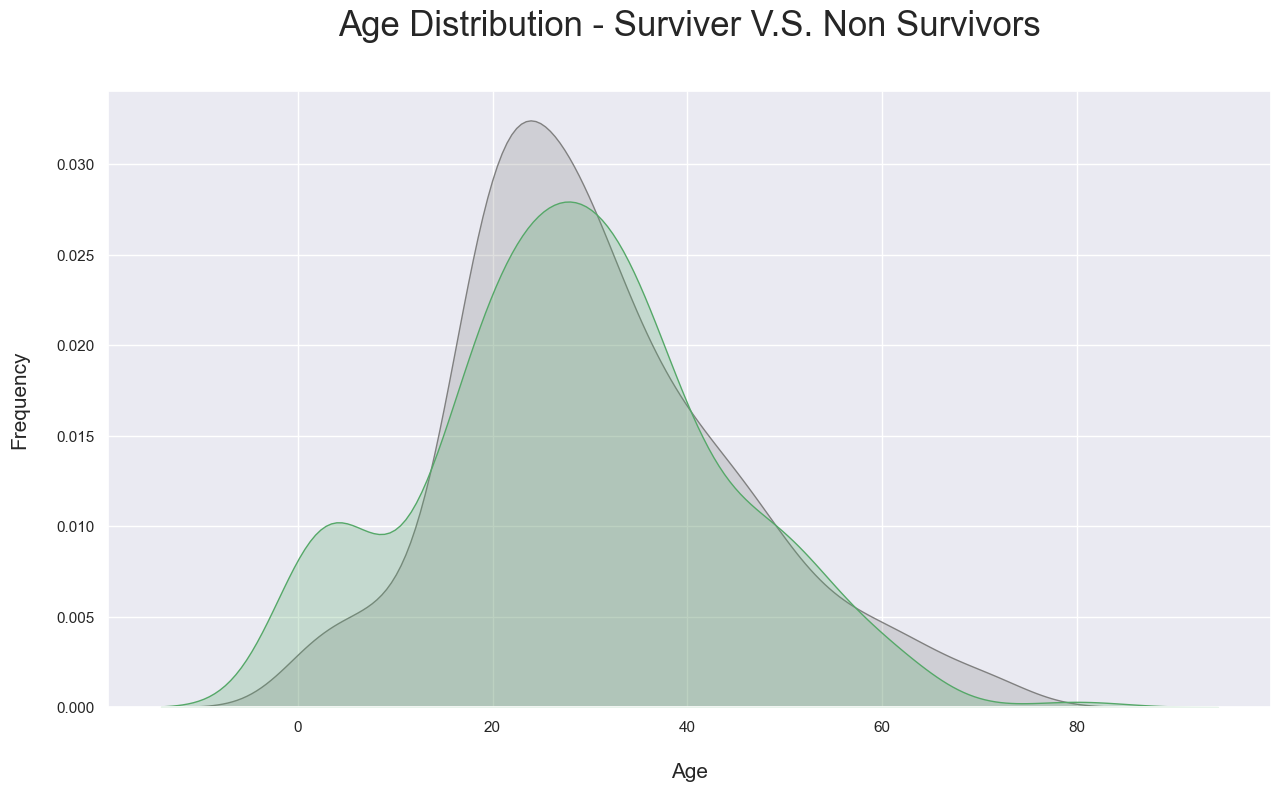

In [44]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors', fontsize = 25, pad = 40)
plt.xlabel("Age", fontsize = 15, labelpad = 20)
plt.ylabel('Frequency', fontsize = 15, labelpad= 20);

# 3e. Combined Feature Relations

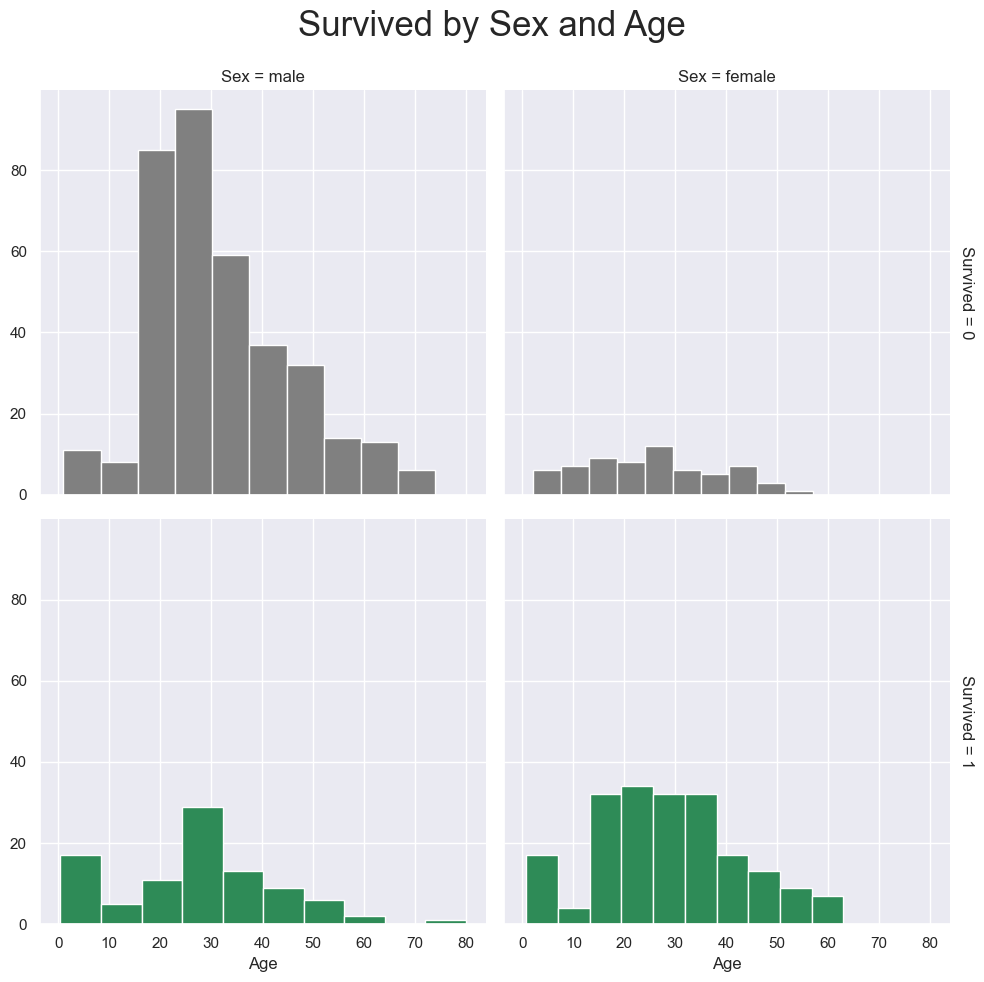

In [47]:
pal = {1:"seagreen", 0:"gray"}
g = sns.FacetGrid(train, height=5, col="Sex", row="Survived", margin_titles=True, hue="Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor='white')
g.fig.suptitle("Survived by Sex and Age", size=25)
plt.subplots_adjust(top=0.90)


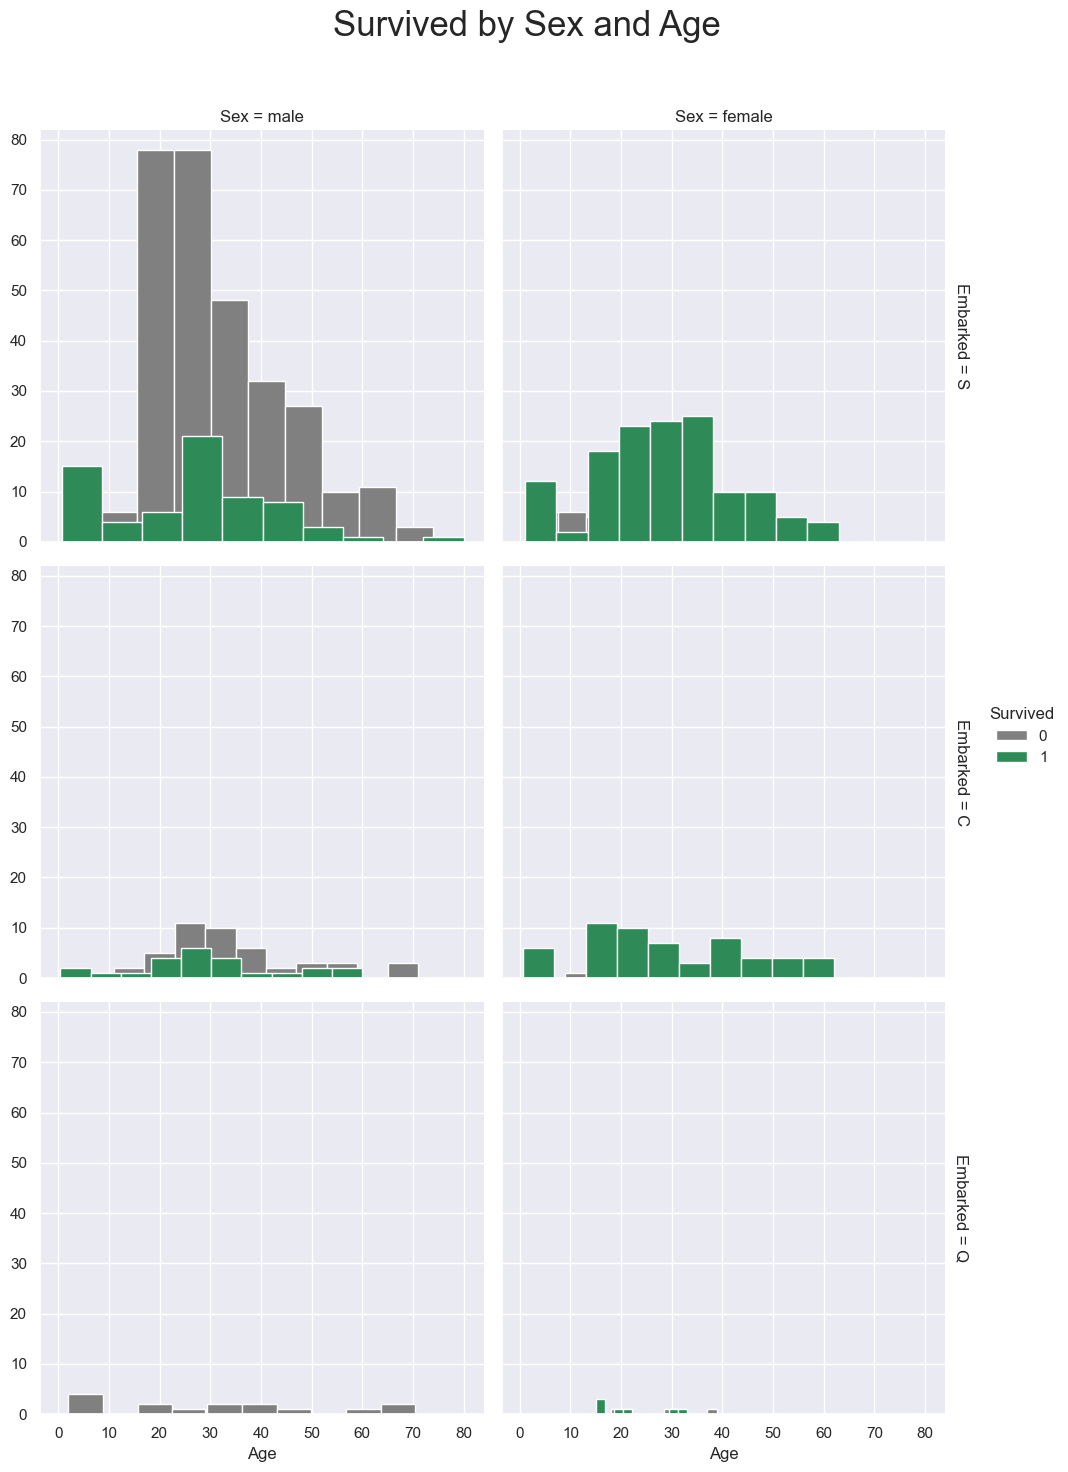

In [49]:
g = sns.FacetGrid(train, height=5, col="Sex", row="Embarked", margin_titles=True, hue="Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor='white').add_legend()
g.fig.suptitle("Survived by Sex and Age", size=25)
plt.subplots_adjust(top=0.90)


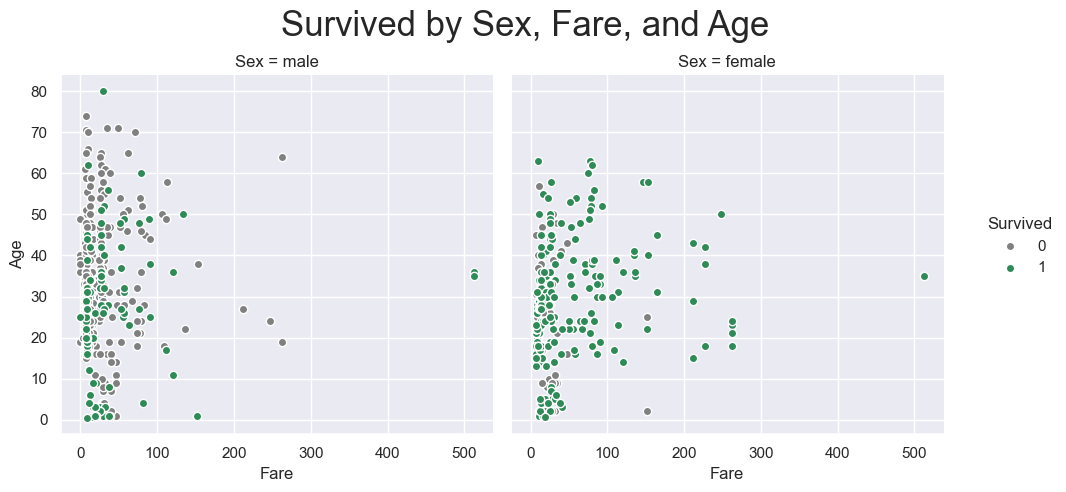

In [51]:
g = sns.FacetGrid(train, height=5, hue="Survived", col="Sex", margin_titles=True, palette=pal)
g.map(plt.scatter, "Fare", "Age", edgecolor="w").add_legend()
g.fig.suptitle("Survived by Sex, Fare, and Age", size=25)
plt.subplots_adjust(top=0.85)


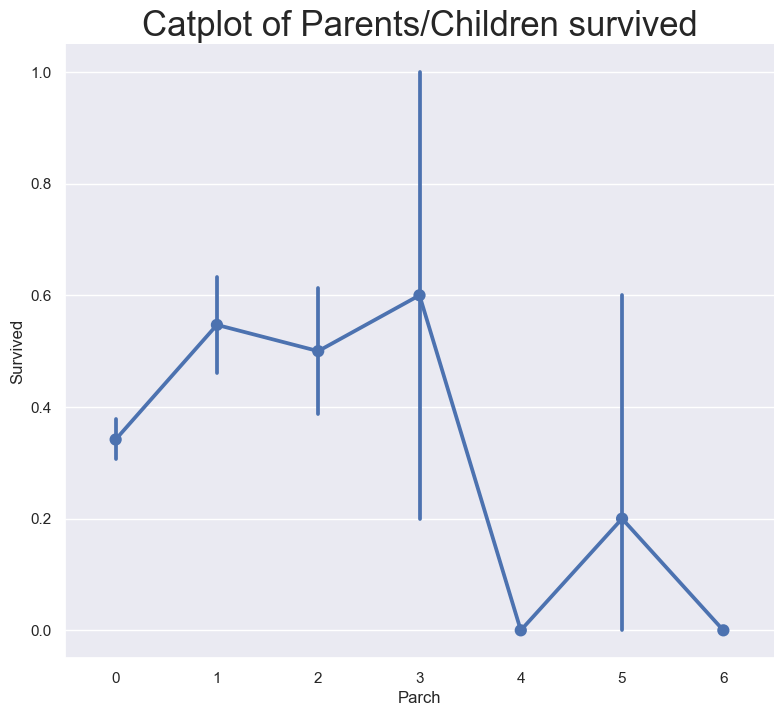

In [58]:
## dropping the three outliers where Fare is over $500 
train = train[train.Fare < 500]

## catplot
sns.catplot(x="Parch", y="Survived", data=train, kind="point", height=8)
plt.title("Catplot of Parents/Children survived", fontsize=25)
plt.subplots_adjust(top=0.85)


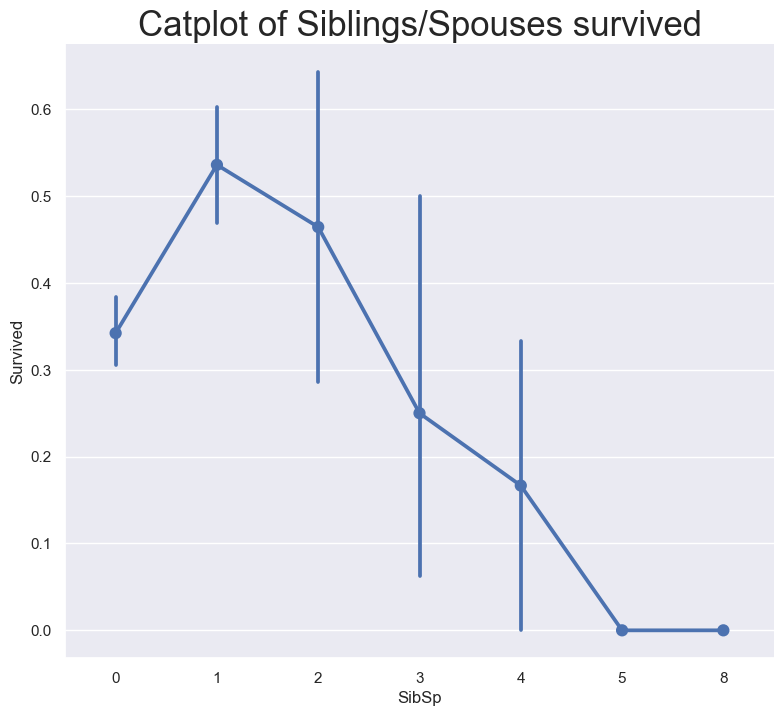

In [57]:
sns.catplot(x="SibSp", y="Survived", data=train, kind="point", height=8)
plt.title('Catplot of Siblings/Spouses survived', fontsize=25)
plt.subplots_adjust(top=0.85)


In [59]:
# Placing 0 for female and 
# 1 for male in the "Sex" column. 
train['Sex'] = train.Sex.apply(lambda x: 0 if x == "female" else 1)
test['Sex'] = test.Sex.apply(lambda x: 0 if x == "female" else 1)

# Part 4: Statistical Overview



In [60]:
train.describe()

PassengerId      Pclass         Sex         Age       SibSp  \
count   888.000000  888.000000  888.000000  711.000000  888.000000   
mean    445.618243    2.313063    0.647523   29.675345    0.524775   
std     257.405474    0.834007    0.478011   14.552495    1.104186   
min       1.000000    1.000000    0.000000    0.420000    0.000000   
25%     222.750000    2.000000    0.000000   20.000000    0.000000   
50%     445.500000    3.000000    1.000000   28.000000    0.000000   
75%     667.250000    3.000000    1.000000   38.000000    1.000000   
max     891.000000    3.000000    1.000000   80.000000    8.000000   

            Parch        Fare    Survived  
count  888.000000  888.000000  888.000000  
mean     0.381757   30.582164    0.381757  
std      0.806949   41.176366    0.486091  
min      0.000000    0.000000    0.000000  
25%      0.000000    7.895800    0.000000  
50%      0.000000   14.454200    0.000000  
75%      0.000000   30.771850    1.000000  
max      6.000000  263.000000    1.000000

In [61]:
train.describe(include =['O'])

Name  Ticket Cabin Embarked
count                       888     888   888      888
unique                      888     680     8        3
top     Braund, Mr. Owen Harris  347082     G        S
freq                          1       7   464      644

In [69]:
# Overview(Survived vs non survied)
survived_summary = train.groupby("Survived")
survived_summary.mean().reset_index()

TypeError: agg function failed [how->mean,dtype->object]

In [73]:
# Filter numeric columns
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns

# Group by "Survived" and compute mean for numeric columns
#survived_summary = train.groupby("Survived")[numeric_columns].mean().reset_index()
survived_summary = train.groupby("Survived")[numeric_columns].mean().reset_index(drop=True)
survived_summary.mean().reset_index()

index           0
0  PassengerId  445.185188
1       Pclass    2.245289
2          Sex    0.584047
3          Age   29.448403
4        SibSp    0.515805
5        Parch    0.397884
6         Fare   33.203843
7     Survived    0.500000

In [76]:
survived_summary = train.groupby("Survived")[numeric_columns].mean().reset_index(drop=True)
survived_summary.mean().reset_index()

index           0
0  PassengerId  445.185188
1       Pclass    2.245289
2          Sex    0.584047
3          Age   29.448403
4        SibSp    0.515805
5        Parch    0.397884
6         Fare   33.203843
7     Survived    0.500000

In [80]:
# Filter numeric columns
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns

# Group by "Sex" and compute mean for numeric columns
survived_summary = train.groupby("Sex")[numeric_columns].mean()
survived_summary.mean().reset_index()

index           0
0  PassengerId  442.419572
1       Pclass    2.278861
2          Sex    0.500000
3          Age   29.296969
4        SibSp    0.563895
5        Parch    0.443270
6         Fare   33.407874
7     Survived    0.463651

In [86]:
# Filter numeric columns excluding "Pclass"
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = numeric_columns.drop("Pclass")

# Group by "Pclass" and compute mean for numeric columns
survived_summary = train.groupby("Pclass")[numeric_columns].mean().reset_index()
survived_summary.mean().reset_index()


index           0
0       Pclass    2.000000
1  PassengerId  448.445553
2          Sex    0.619019
3          Age   31.099744
4        SibSp    0.479927
5        Parch    0.376773
6         Fare   37.487265
7     Survived    0.446534

# 4a. Correlation Matrix and Heatmap

In [88]:
# Filter numeric columns
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation with "Survived" and sort
correlation_with_survived = abs(train[numeric_columns].corr()['Survived']).sort_values(ascending=False)

# Create a DataFrame from the correlation series
correlation_df = pd.DataFrame(correlation_with_survived)

# Print the DataFrame
print(correlation_df)


             Survived
Survived     1.000000
Sex          0.545899
Pclass       0.334068
Fare         0.261742
Parch        0.082157
Age          0.079472
SibSp        0.033395
PassengerId  0.006916


In [90]:
# Filter numeric columns
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation and square the values
corr_squared = train[numeric_columns].corr() ** 2

# Sort the correlations with "Survived" in descending order
sorted_correlation = corr_squared['Survived'].sort_values(ascending=False)

# Print the sorted correlation
print(sorted_correlation)


Survived       1.000000
Sex            0.298006
Pclass         0.111601
Fare           0.068509
Parch          0.006750
Age            0.006316
SibSp          0.001115
PassengerId    0.000048
Name: Survived, dtype: float64


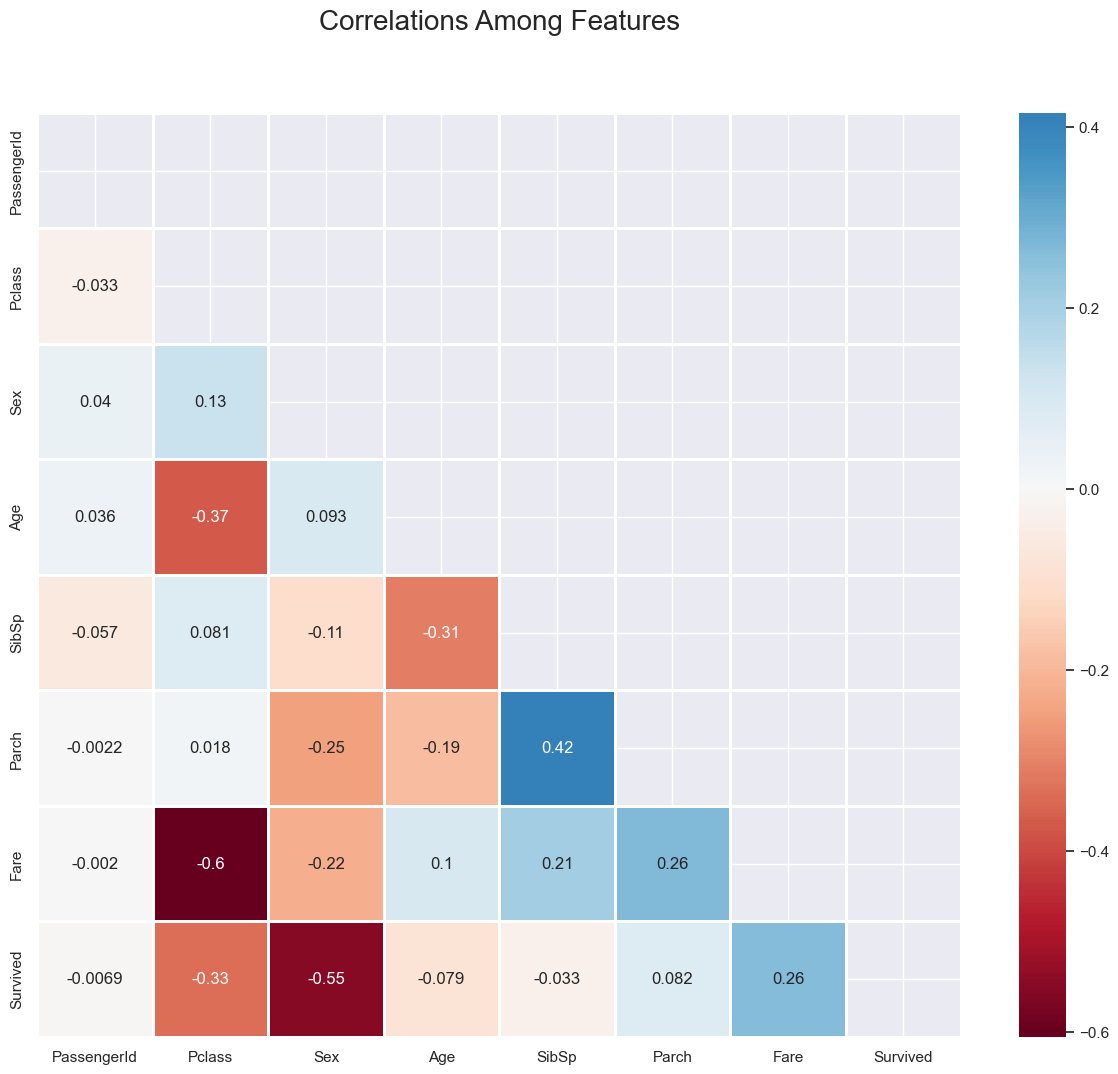

In [92]:
# Filter numeric columns
numeric_train = train.select_dtypes(include=['int64', 'float64'])

# Generate a mask for the upper triangle
mask = np.zeros_like(numeric_train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
plt.subplots(figsize=(15, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(numeric_train.corr(), 
            annot=True,
            mask=mask,
            cmap='RdBu',
            linewidths=0.9,
            linecolor='white',
            fmt='.2g',
            center=0,
            square=True)

# Set plot title and adjust position
plt.title("Correlations Among Features", y=1.03, fontsize=20, pad=40)

# Show the plot
plt.show()


Positive Correlation Features:
Fare and Survived: 0.26
Negative Correlation Features:
Fare and Pclass: -0.6
Sex and Survived: -0.55
Pclass and Survived: -0.33